## Purpose

To compute the ML performance of the proposed method in near real-time.

In [1]:
import json
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

## Load the Dataset

In [2]:
# file = "results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json"
# file = "results_correlated_signal_attack_3_masquerade_distribution_ROAD.json"
file = "results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json"

with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
    grid2performance = json.load(outfile)

In [3]:
grid2performance.keys()

dict_keys(['50-10', '50-20', '50-30', '50-40', '50-50', '100-10', '100-20', '100-30', '100-40', '100-50', '100-60', '100-70', '100-80', '100-90', '100-100', '150-10', '150-20', '150-30', '150-40', '150-50', '150-60', '150-70', '150-80', '150-90', '150-100', '150-110', '150-120', '150-130', '150-140', '150-150', '200-10', '200-20', '200-30', '200-40', '200-50', '200-60', '200-70', '200-80', '200-90', '200-100', '200-110', '200-120', '200-130', '200-140', '200-150', '200-160', '200-170', '200-180', '200-190', '200-200', '250-10', '250-20', '250-30', '250-40', '250-50', '250-60', '250-70', '250-80', '250-90', '250-100', '250-110', '250-120', '250-130', '250-140', '250-150', '250-160', '250-170', '250-180', '250-190', '250-200', '250-210', '250-220', '250-230', '250-240', '250-250', '300-10', '300-20', '300-30', '300-40', '300-50', '300-60', '300-70', '300-80', '300-90', '300-100', '300-110', '300-120', '300-130', '300-140', '300-150', '300-160', '300-170', '300-180', '300-190', '300-200',

In [4]:
key2aucroc = defaultdict(list)
index = []

for key in grid2performance.keys():

    ground_truth = grid2performance[key]["ground_truth"]
    predict_proba = grid2performance[key]["predict_proba"]

    # print(key)
    # if len(set(ground_truth)) == 1:
    #     print(ground_truth)

    # print(len(ground_truth), ground_truth)
    # print(len(predict_proba), predict_proba)

    columns = key.split("-")

    # print(columns)
    key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
    # sample.append(dict(entry))

    if columns[1] not in index: 
        index.append(columns[1])

    # break

key2aucroc = dict(key2aucroc)
# print(key2aucroc)
# print(len(index), index)

df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
df_rocauc.index = index

In [5]:
display(df_rocauc)
df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows
display(df_rocauc)

50       100       150       200       250       300       350  \
10   0.662140  0.666202  0.618910  0.589901  0.560669  0.551153  0.559495   
20   0.647814  0.662547  0.627419  0.590998  0.572398  0.556428  0.564789   
30   0.639063  0.672572  0.624879  0.583376  0.557070  0.555171  0.544753   
40   0.631148  0.651778  0.618619  0.597738  0.589489  0.552239  0.552832   
50   0.623162  0.646046  0.593333  0.577731  0.536982  0.524371  0.531987   
60        NaN  0.657633  0.620000  0.571284  0.558884  0.581111  0.557895   
70        NaN  0.655952  0.574495  0.610811  0.549075  0.539474  0.535256   
80        NaN  0.635484  0.644737  0.586453  0.570410  0.543137  0.554622   
90        NaN  0.660819  0.672269  0.598739  0.570115  0.537931  0.543590   
100       NaN  0.661765  0.622500  0.573333  0.618132  0.502959  0.552469   
110       NaN       NaN  0.630435  0.540373  0.569444  0.541667  0.552727   
120       NaN       NaN  0.626374  0.556777  0.571970  0.574380  0.549587   
130       NaN       NaN  0.691667  0.586364  0.486364  0.623810  0.534392   
140       NaN       NaN  0.587963  0.631579  0.605263  0.573684  0.600000   
150       NaN       NaN  0.684492  0.552941  0.529412  0.592593  0.500000   
160       NaN       NaN       NaN  0.620915  0.620915  0.566176  0.558824   
170       NaN       NaN       NaN  0.562963  0.518519  0.578125  0.539062   
180       NaN       NaN       NaN  0.515873  0.500000  0.483333  0.504762   
190       NaN       NaN       NaN  0.660714  0.616071  0.469388  0.469388   
200       NaN       NaN       NaN  0.625000  0.634615  0.417582  0.523810   
210       NaN       NaN       NaN       NaN  0.447917  0.516484  0.500000   
220       NaN       NaN       NaN       NaN  0.654762  0.619048  0.595238   
230       NaN       NaN       NaN       NaN  0.555556  0.513889  0.513889   
240       NaN       NaN       NaN       NaN  0.649351  0.575758  0.545455   
250       NaN       NaN       NaN       NaN  0.542857  0.471429  0.545455   
260       NaN       NaN       NaN       NaN       NaN  0.654545  0.581818   
270       NaN       NaN       NaN       NaN       NaN  0.566667  0.540000   
280       NaN       NaN       NaN       NaN       NaN  0.520000  0.440000   
290       NaN       NaN       NaN       NaN       NaN  0.388889  0.400000   
300       NaN       NaN       NaN       NaN       NaN  0.533333  0.511111   
310       NaN       NaN       NaN       NaN       NaN       NaN  0.437500   
320       NaN       NaN       NaN       NaN       NaN       NaN  0.500000   
330       NaN       NaN       NaN       NaN       NaN       NaN  0.472222   
340       NaN       NaN       NaN       NaN       NaN       NaN  0.575000   
350       NaN       NaN       NaN       NaN       NaN       NaN  0.593750   
360       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
370       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
380       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
390       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
400       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          400  
10   0.578270  
20   0.580438  
30   0.562582  
40   0.593452  
50   0.554545  
60   0.554987  
70   0.553846  
80   0.593407  
90   0.535897  
100  0.528620  
110  0.540000  
120  0.570048  
130  0.555556  
140  0.612500  
150  0.527778  
160  0.666667  
170  0.544643  
180  0.514286  
190  0.533333  
200  0.535714  
210  0.551282  
220  0.555556  
230  0.584615  
240  0.633333  
250  0.618182  
260  0.636364  
270  0.520000  
280  0.520000  
290  0.488889  
300  0.533333  
310  0.666667  
320  0.750000  
330  0.472222  
340  0.500000  
350  0.625000  
360  0.593750  
370  0.642857  
380  0.464286  
390  0.642857  
400  0.535714

50       100       150       200       250       300       350  \
400       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
390       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
380       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
370       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
360       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
350       NaN       NaN       NaN       NaN       NaN       NaN  0.593750   
340       NaN       NaN       NaN       NaN       NaN       NaN  0.575000   
330       NaN       NaN       NaN       NaN       NaN       NaN  0.472222   
320       NaN       NaN       NaN       NaN       NaN       NaN  0.500000   
310       NaN       NaN       NaN       NaN       NaN       NaN  0.437500   
300       NaN       NaN       NaN       NaN       NaN  0.533333  0.511111   
290       NaN       NaN       NaN       NaN       NaN  0.388889  0.400000   
280       NaN       NaN       NaN       NaN       NaN  0.520000  0.440000   
270       NaN       NaN       NaN       NaN       NaN  0.566667  0.540000   
260       NaN       NaN       NaN       NaN       NaN  0.654545  0.581818   
250       NaN       NaN       NaN       NaN  0.542857  0.471429  0.545455   
240       NaN       NaN       NaN       NaN  0.649351  0.575758  0.545455   
230       NaN       NaN       NaN       NaN  0.555556  0.513889  0.513889   
220       NaN       NaN       NaN       NaN  0.654762  0.619048  0.595238   
210       NaN       NaN       NaN       NaN  0.447917  0.516484  0.500000   
200       NaN       NaN       NaN  0.625000  0.634615  0.417582  0.523810   
190       NaN       NaN       NaN  0.660714  0.616071  0.469388  0.469388   
180       NaN       NaN       NaN  0.515873  0.500000  0.483333  0.504762   
170       NaN       NaN       NaN  0.562963  0.518519  0.578125  0.539062   
160       NaN       NaN       NaN  0.620915  0.620915  0.566176  0.558824   
150       NaN       NaN  0.684492  0.552941  0.529412  0.592593  0.500000   
140       NaN       NaN  0.587963  0.631579  0.605263  0.573684  0.600000   
130       NaN       NaN  0.691667  0.586364  0.486364  0.623810  0.534392   
120       NaN       NaN  0.626374  0.556777  0.571970  0.574380  0.549587   
110       NaN       NaN  0.630435  0.540373  0.569444  0.541667  0.552727   
100       NaN  0.661765  0.622500  0.573333  0.618132  0.502959  0.552469   
90        NaN  0.660819  0.672269  0.598739  0.570115  0.537931  0.543590   
80        NaN  0.635484  0.644737  0.586453  0.570410  0.543137  0.554622   
70        NaN  0.655952  0.574495  0.610811  0.549075  0.539474  0.535256   
60        NaN  0.657633  0.620000  0.571284  0.558884  0.581111  0.557895   
50   0.623162  0.646046  0.593333  0.577731  0.536982  0.524371  0.531987   
40   0.631148  0.651778  0.618619  0.597738  0.589489  0.552239  0.552832   
30   0.639063  0.672572  0.624879  0.583376  0.557070  0.555171  0.544753   
20   0.647814  0.662547  0.627419  0.590998  0.572398  0.556428  0.564789   
10   0.662140  0.666202  0.618910  0.589901  0.560669  0.551153  0.559495   

          400  
400  0.535714  
390  0.642857  
380  0.464286  
370  0.642857  
360  0.593750  
350  0.625000  
340  0.500000  
330  0.472222  
320  0.750000  
310  0.666667  
300  0.533333  
290  0.488889  
280  0.520000  
270  0.520000  
260  0.636364  
250  0.618182  
240  0.633333  
230  0.584615  
220  0.555556  
210  0.551282  
200  0.535714  
190  0.533333  
180  0.514286  
170  0.544643  
160  0.666667  
150  0.527778  
140  0.612500  
130  0.555556  
120  0.570048  
110  0.540000  
100  0.528620  
90   0.535897  
80   0.593407  
70   0.553846  
60   0.554987  
50   0.554545  
40   0.593452  
30   0.562582  
20   0.580438  
10   0.578270

## Visualization

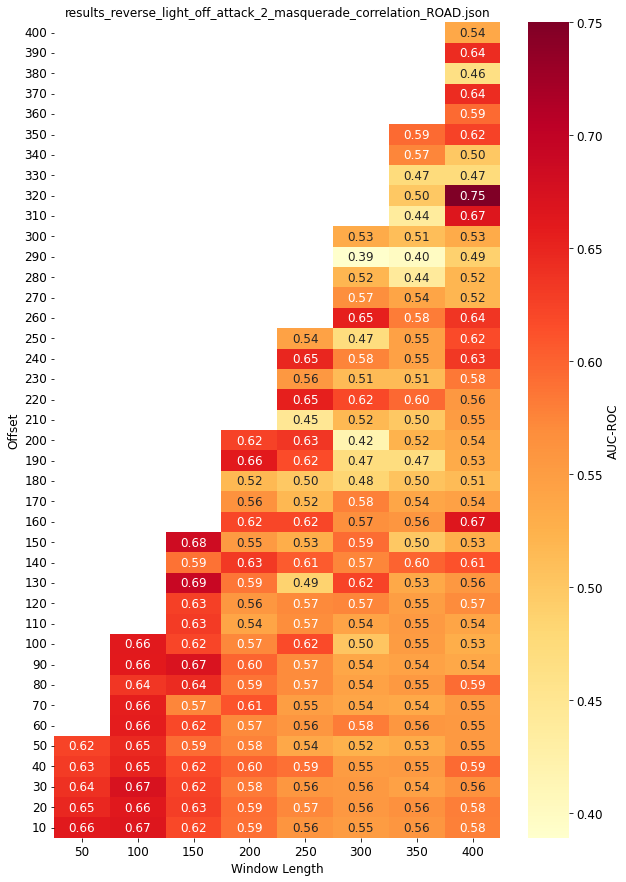

In [6]:
fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
        annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title(file, fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
        g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by Distribution Method

In [7]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_distribution_ROAD.json"):
            files.append(file)
            # print(file)

files = sorted(files)
print(files)
#files = [files[8], files[7], files[1], files[5], files[4], files[12], files[3], files[2], files[11]]
#print(files)

['results_correlated_signal_attack_1_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_2_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_3_masquerade_distribution_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_1_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_2_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_3_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json']


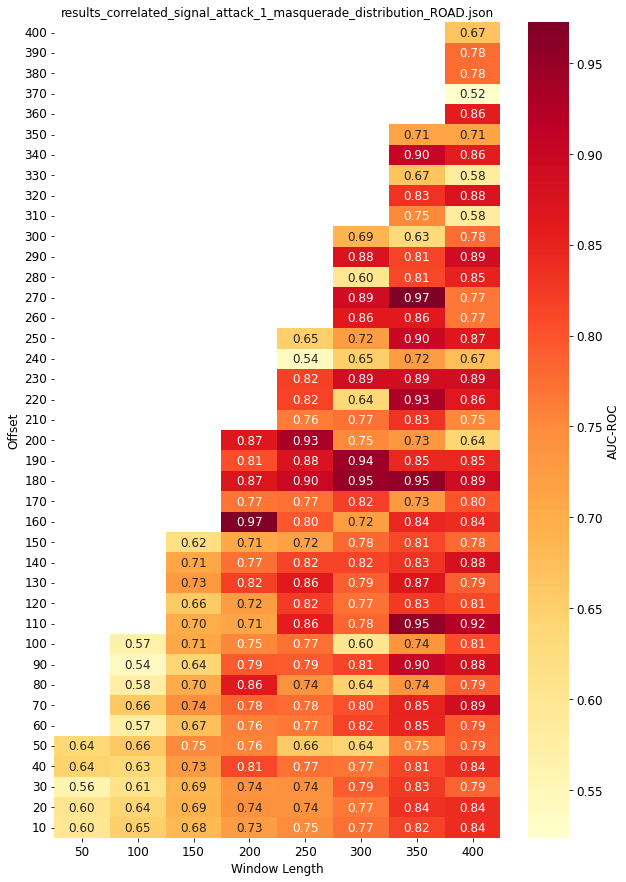

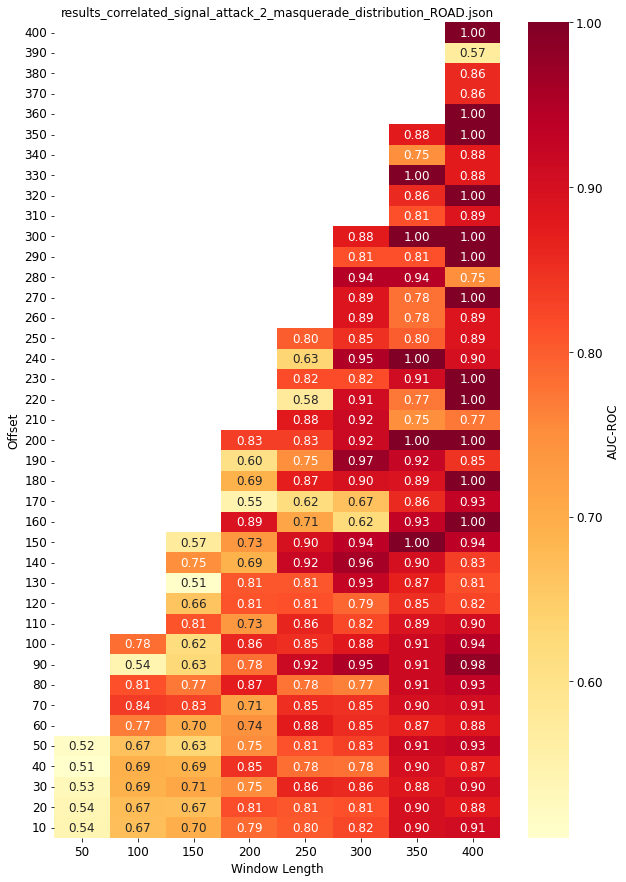

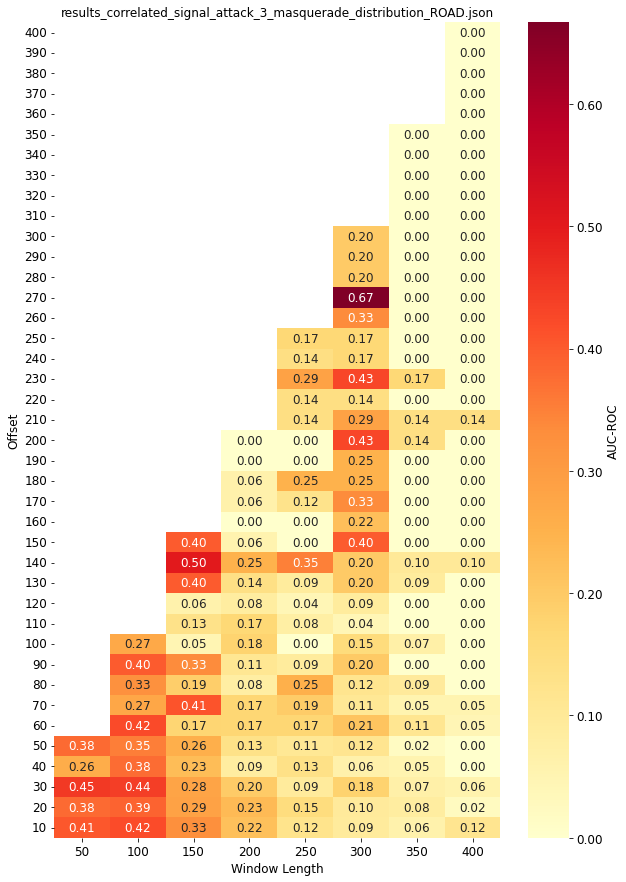

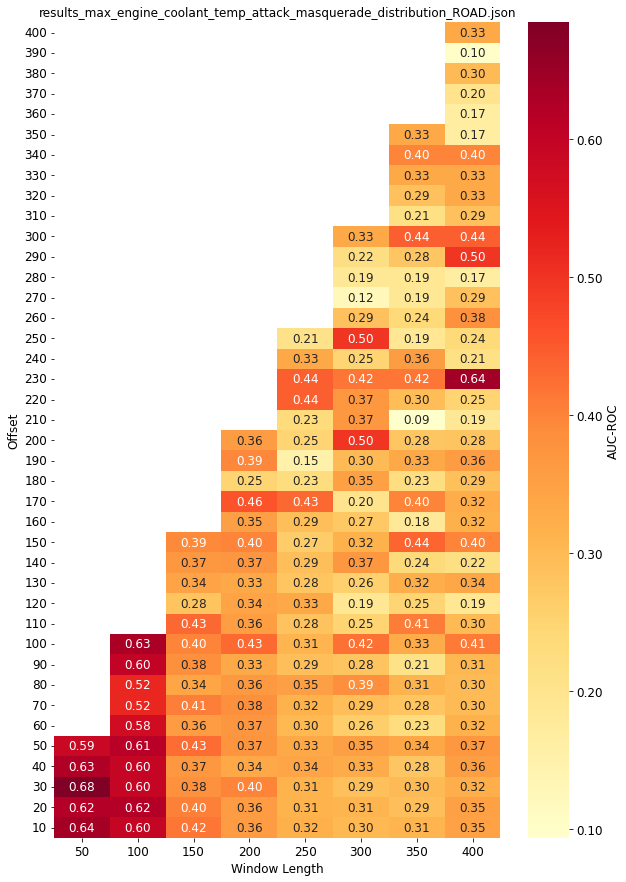

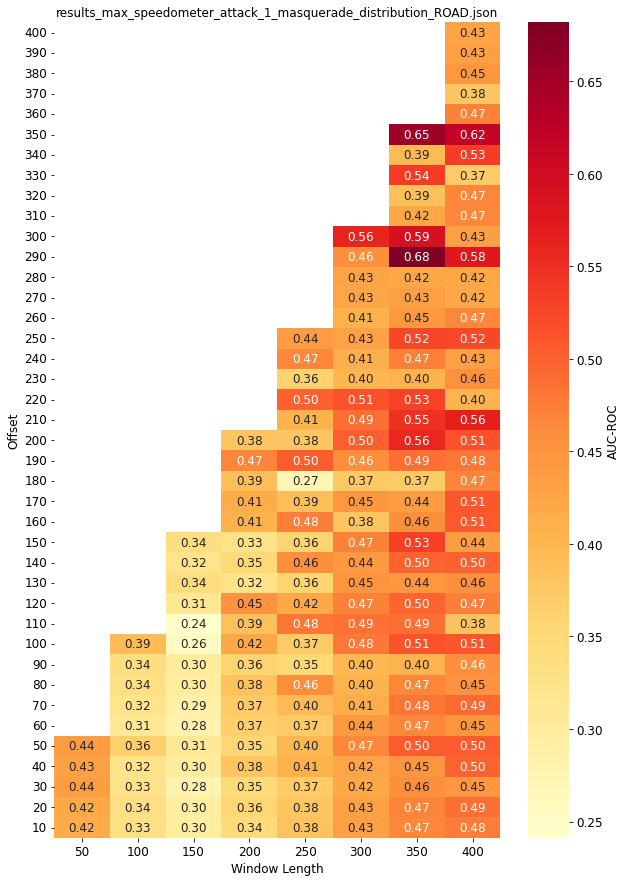

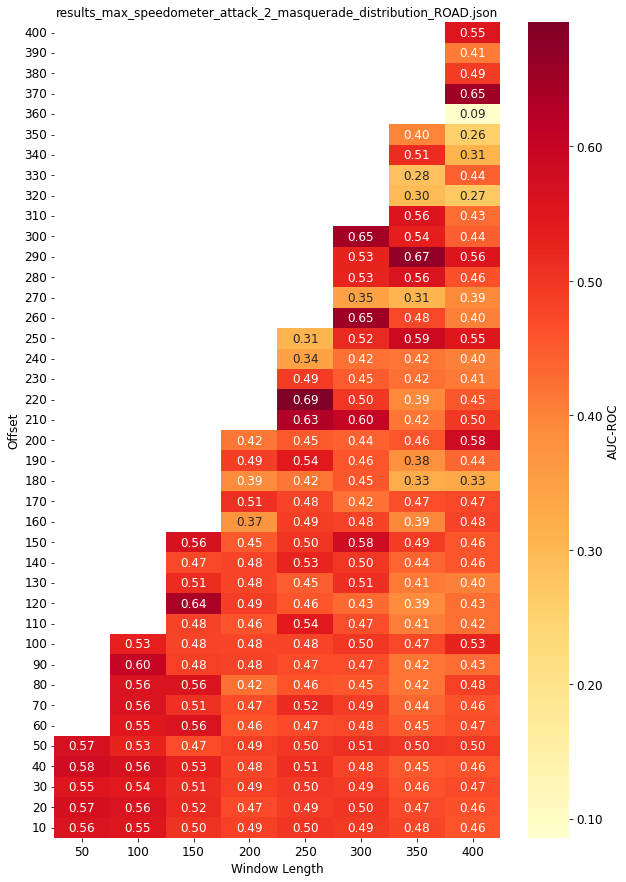

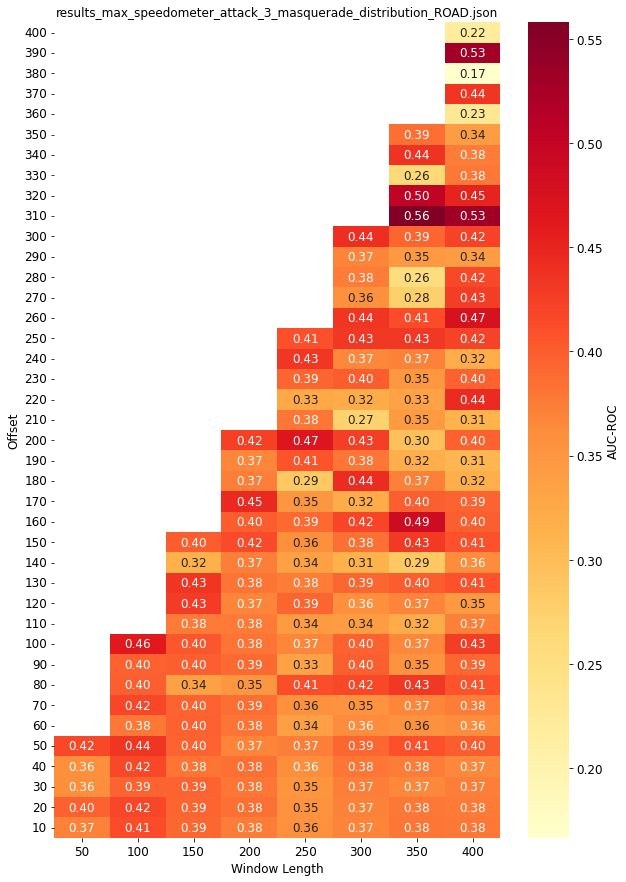

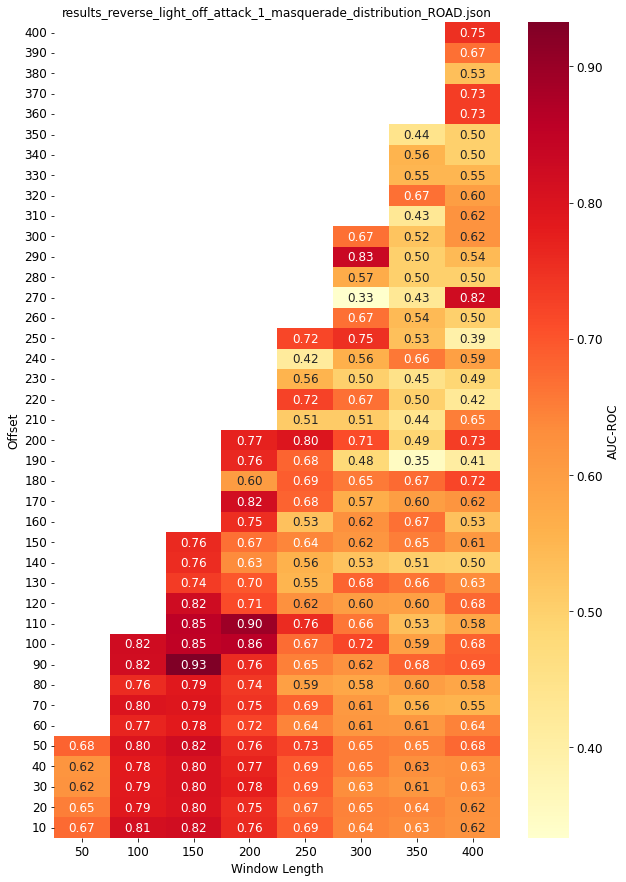

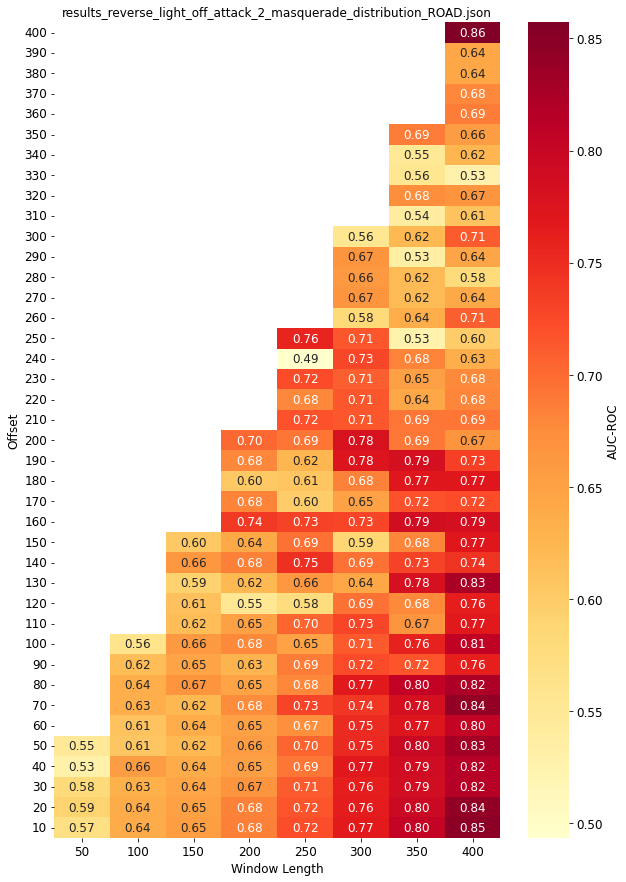

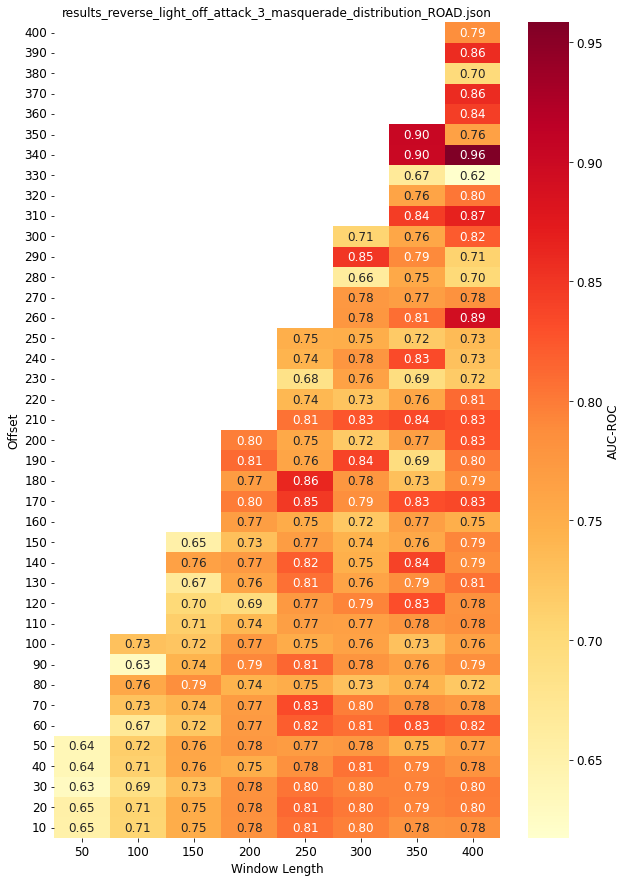

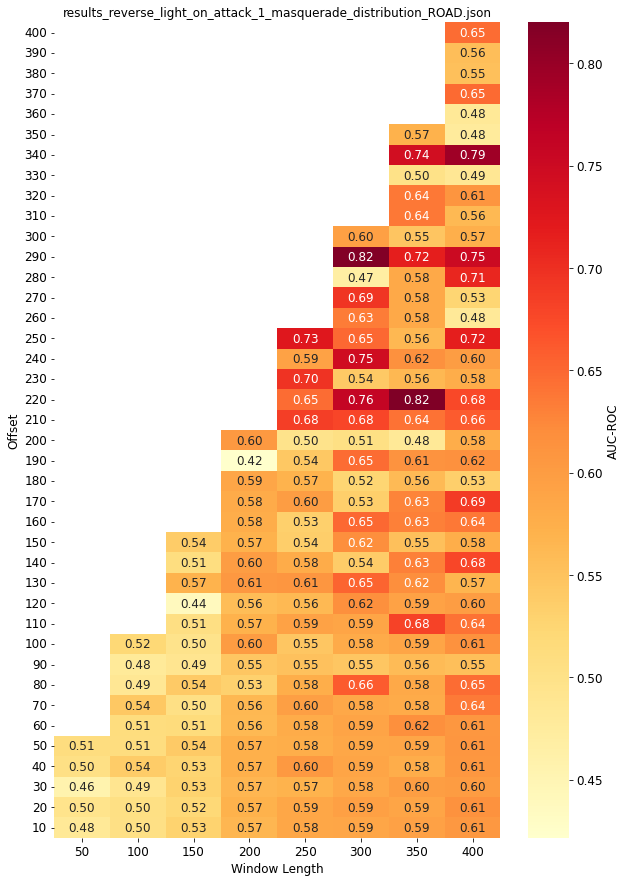

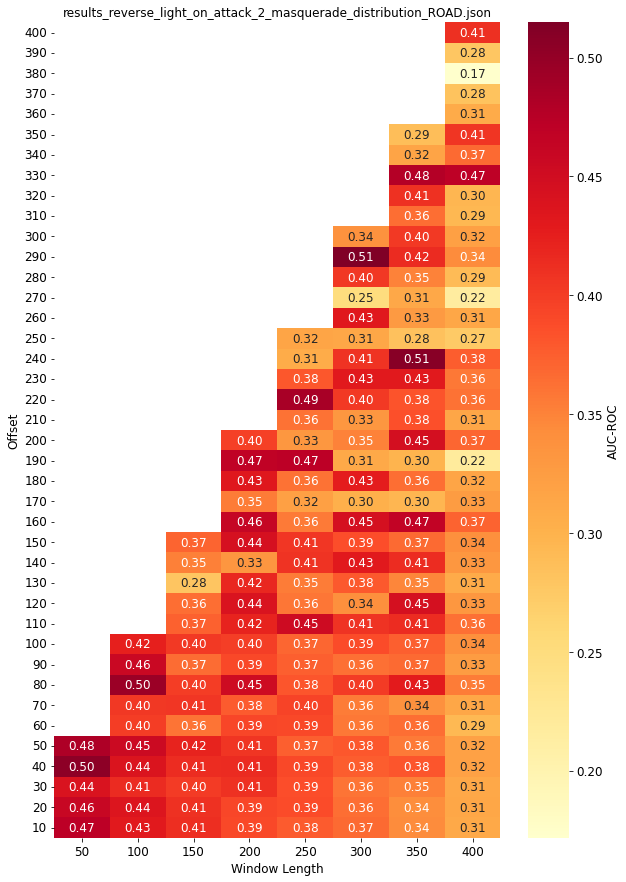

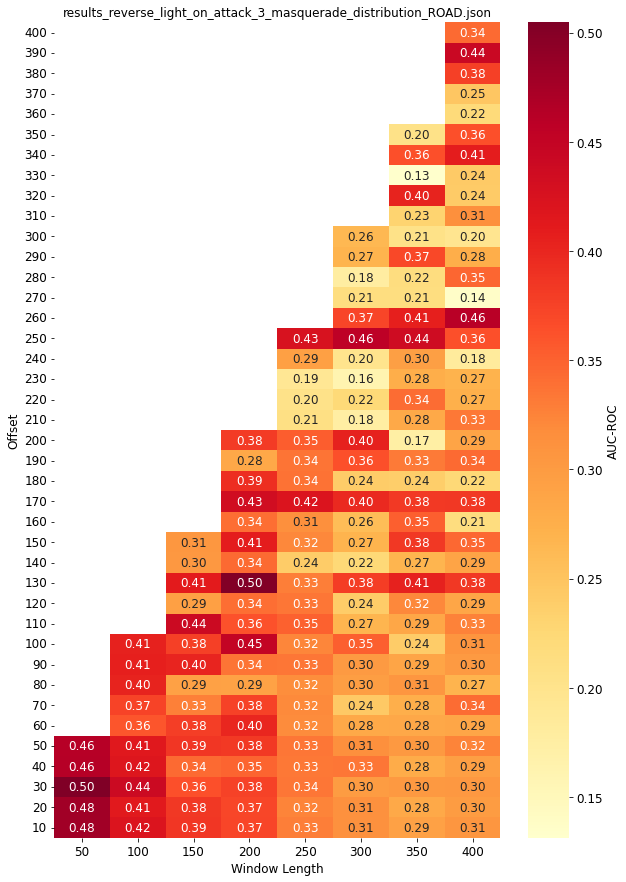

In [9]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(index)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index
    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by Correlation Method

In [11]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_correlation_ROAD.json"):
            files.append(file)

print(files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

['results_reverse_light_on_attack_3_masquerade_correlation_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_correlation_ROAD.json']


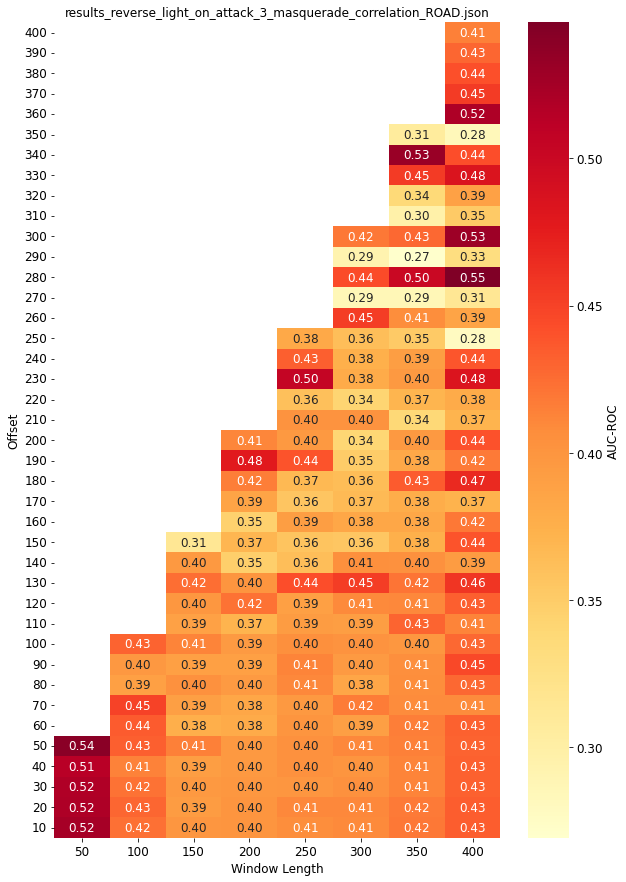

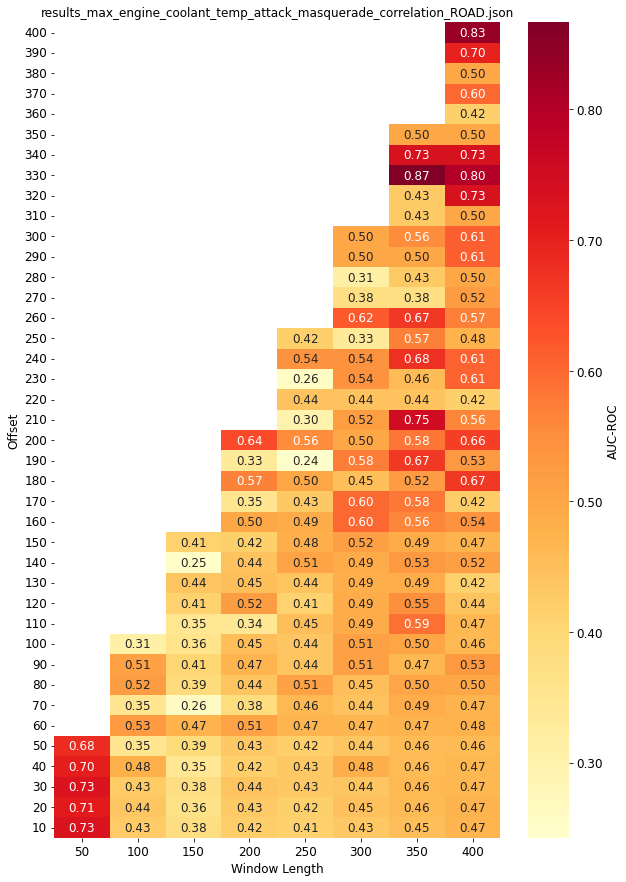

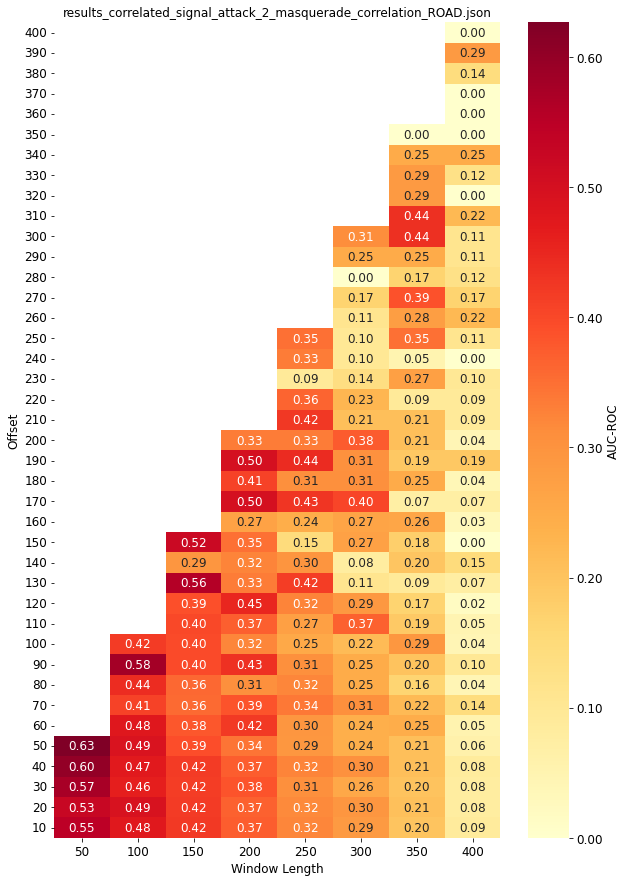

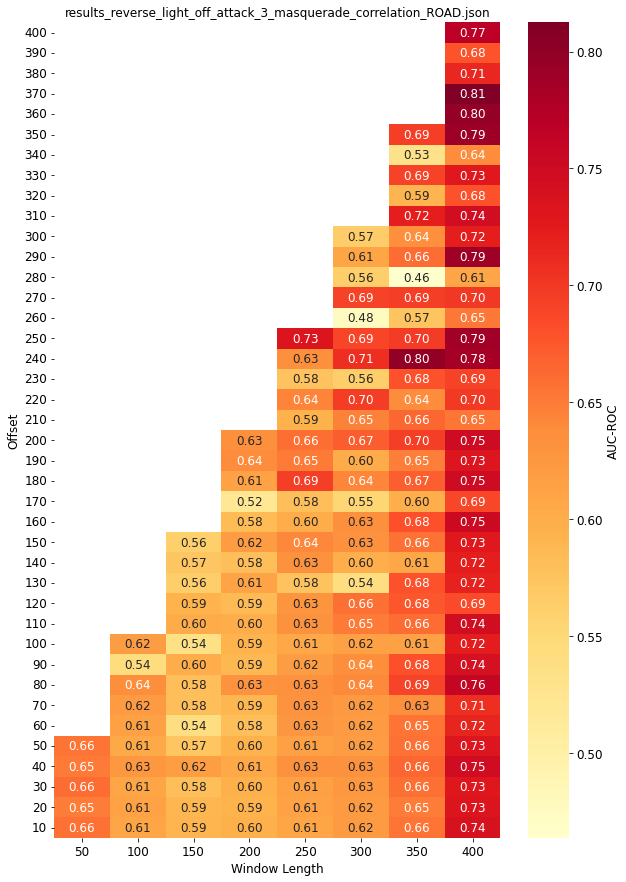

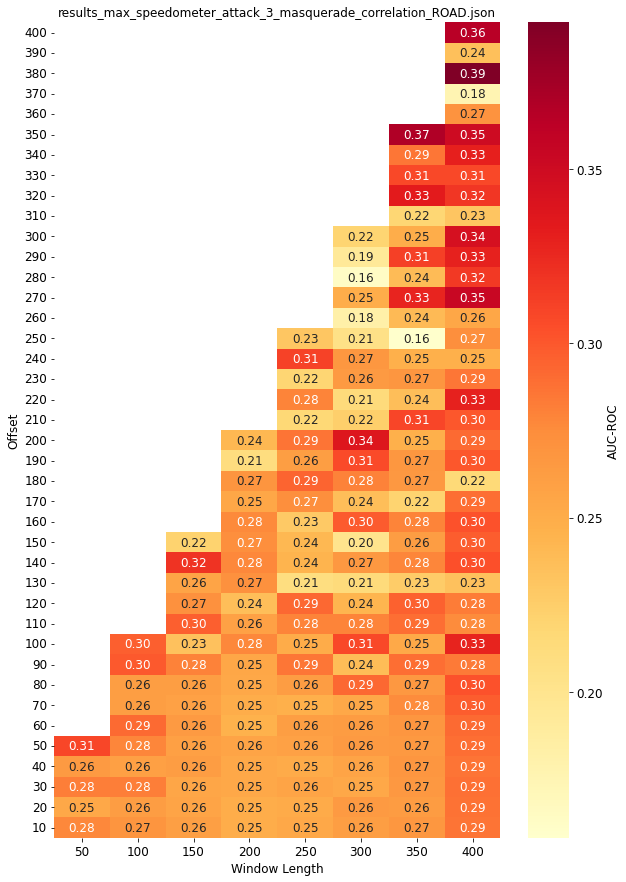

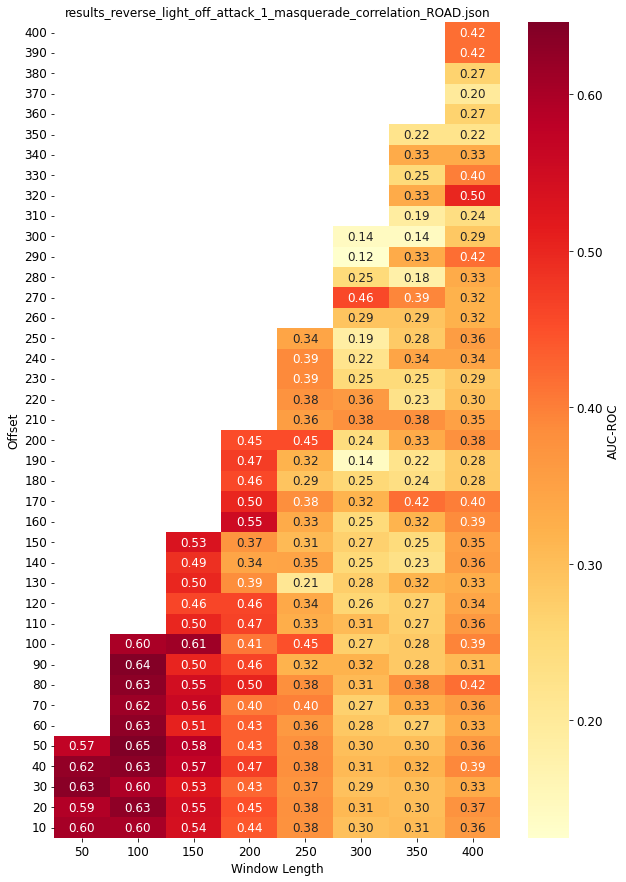

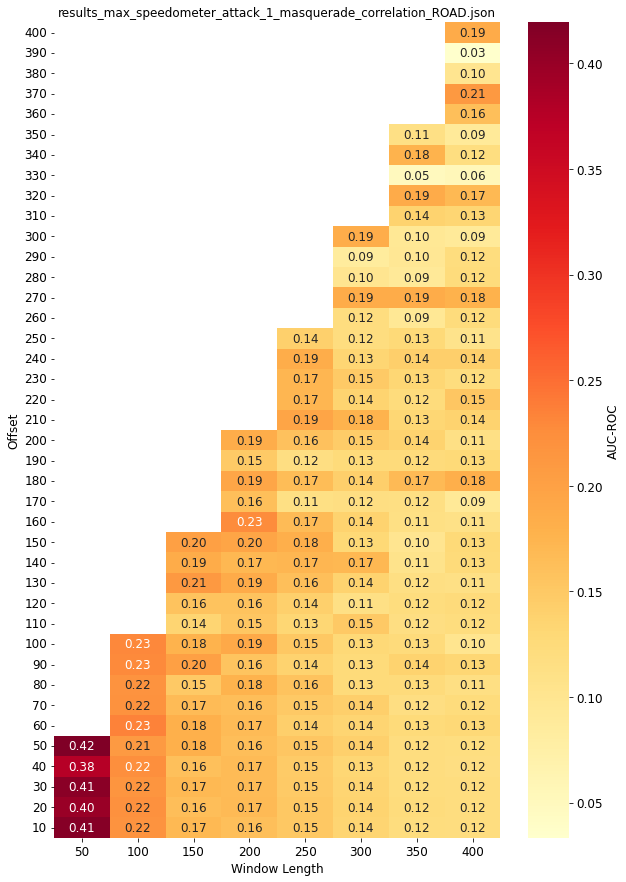

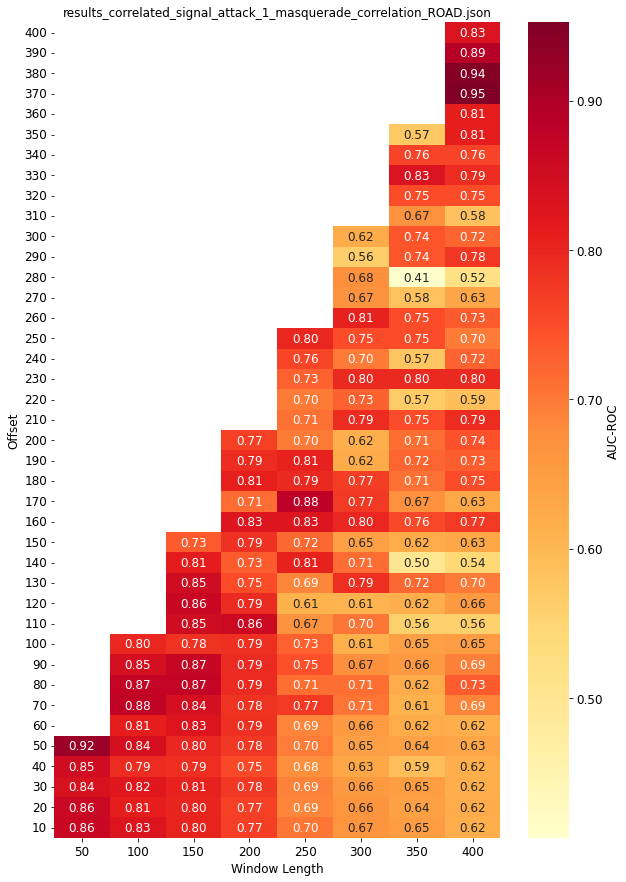

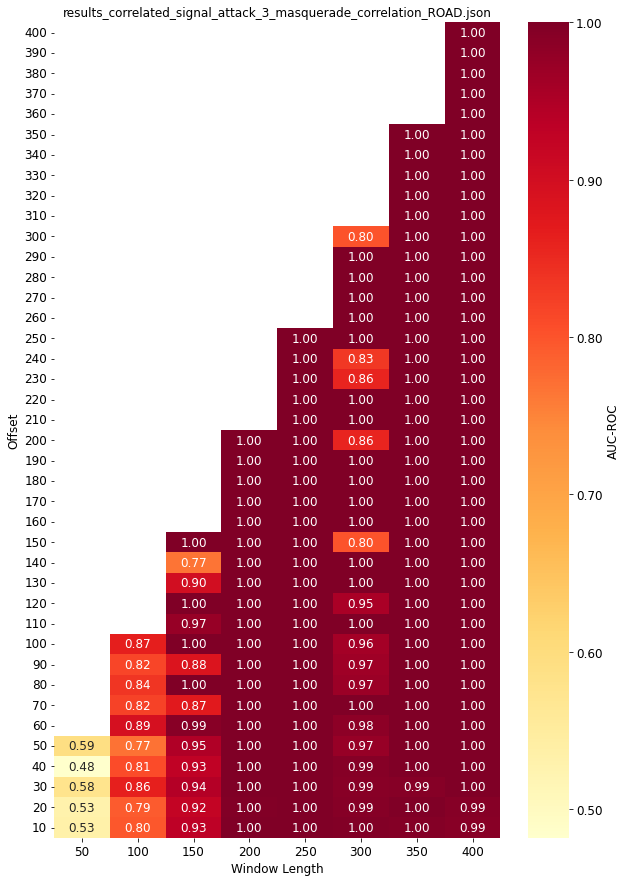

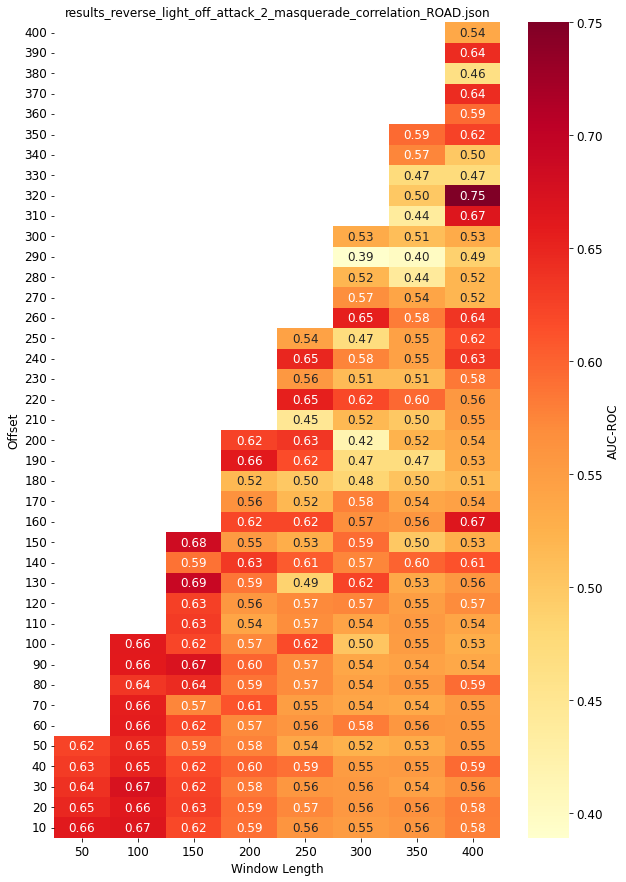

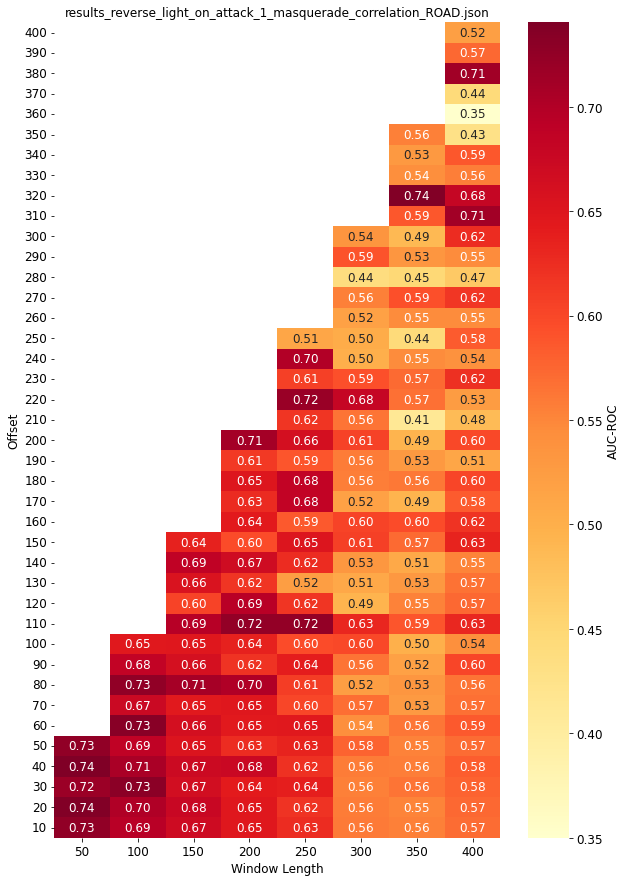

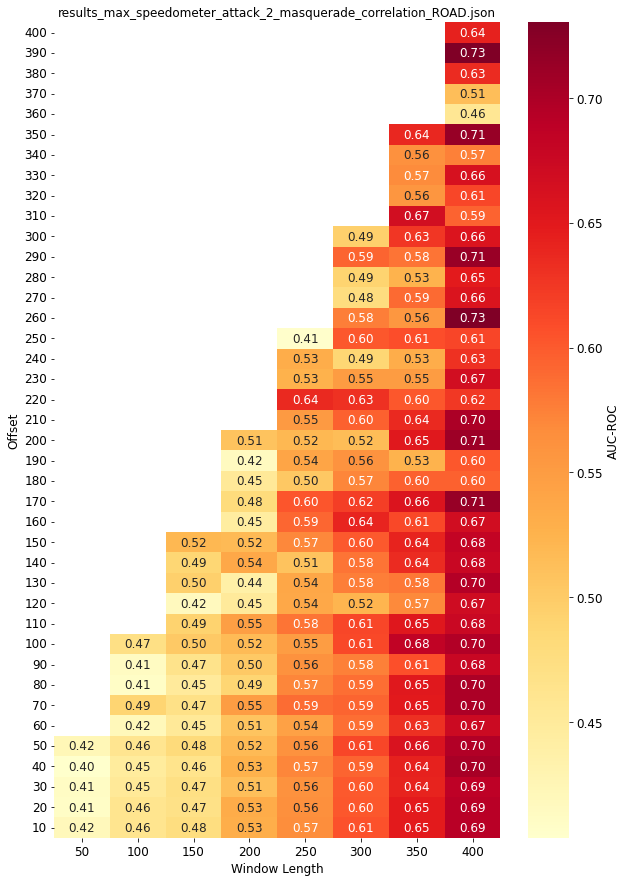

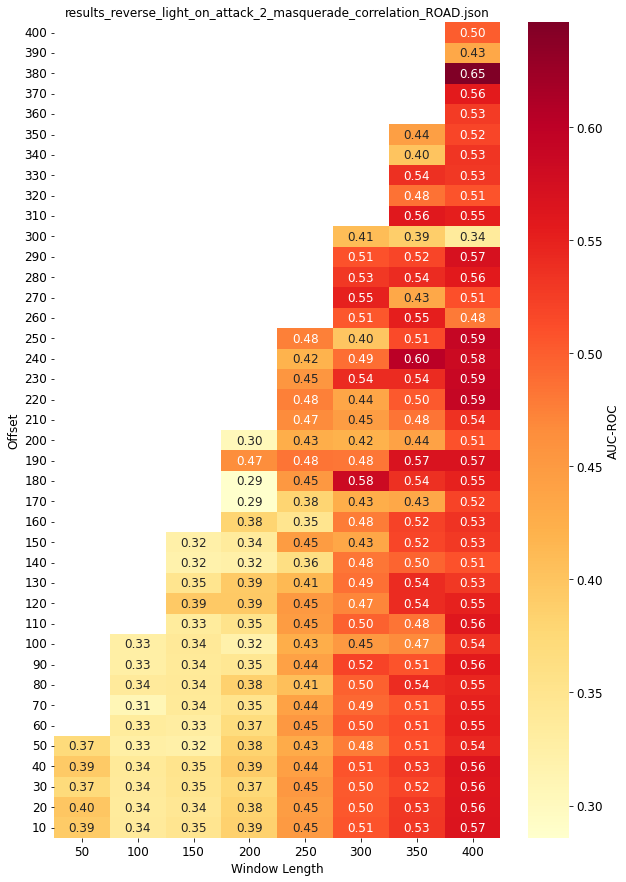

In [12]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index

    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by DBSCAN Method

In [13]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_DBSCAN_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_correlated_signal_attack_2_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_DBSCAN_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_1_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_1_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_3_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_2_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_DBSCAN_ROAD.json']


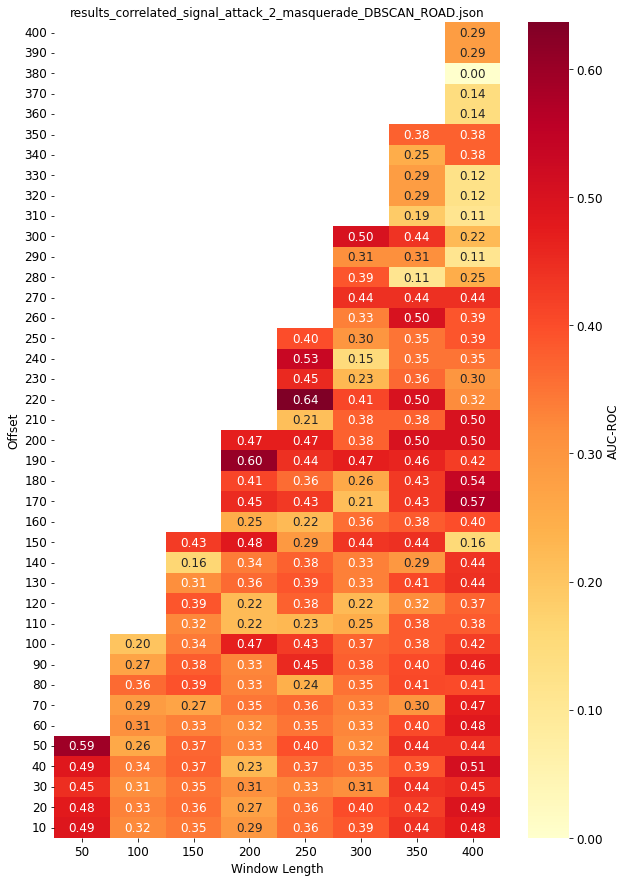

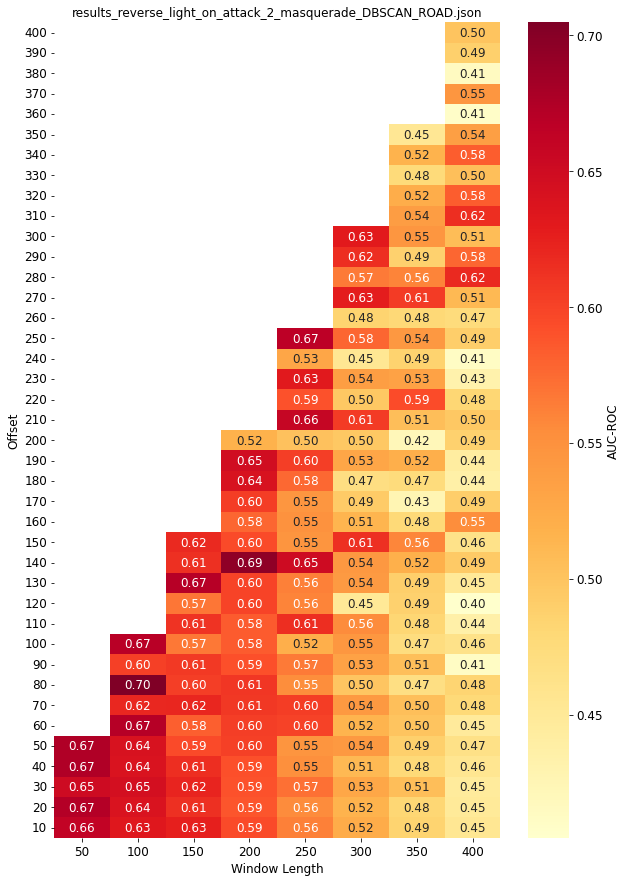

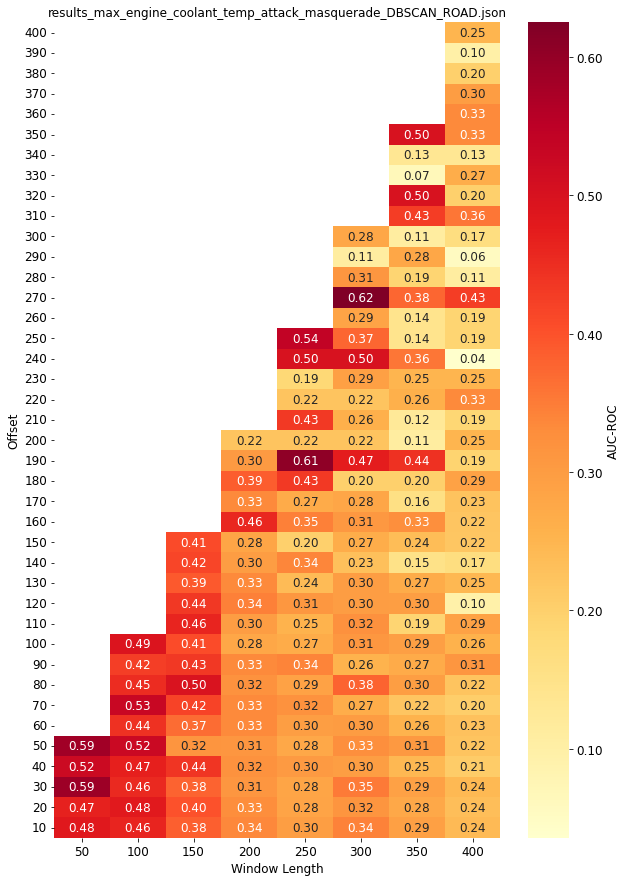

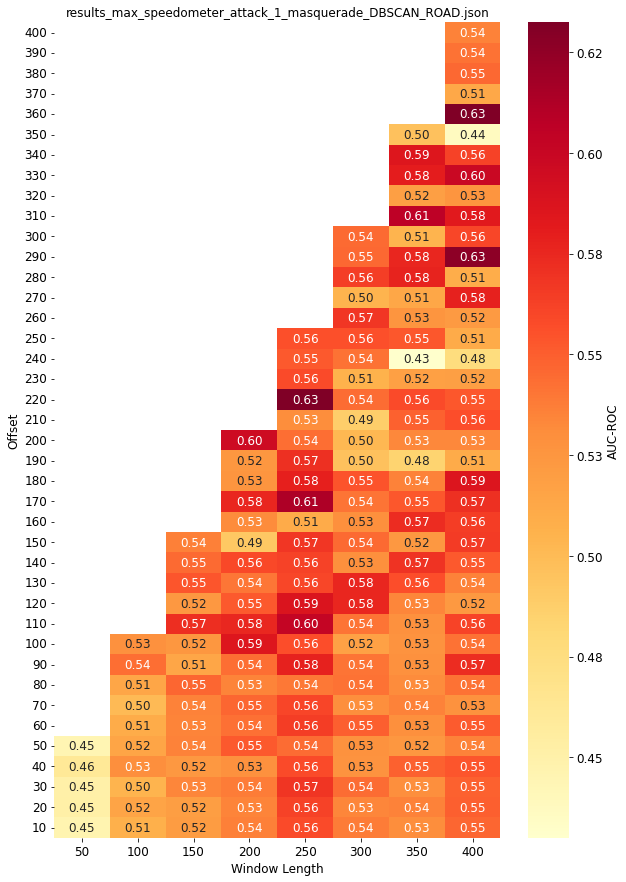

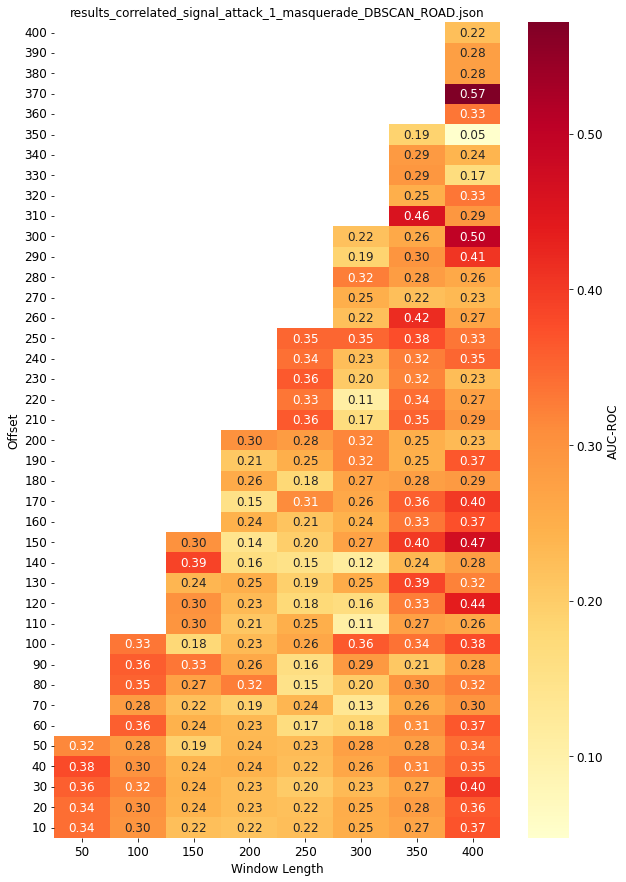

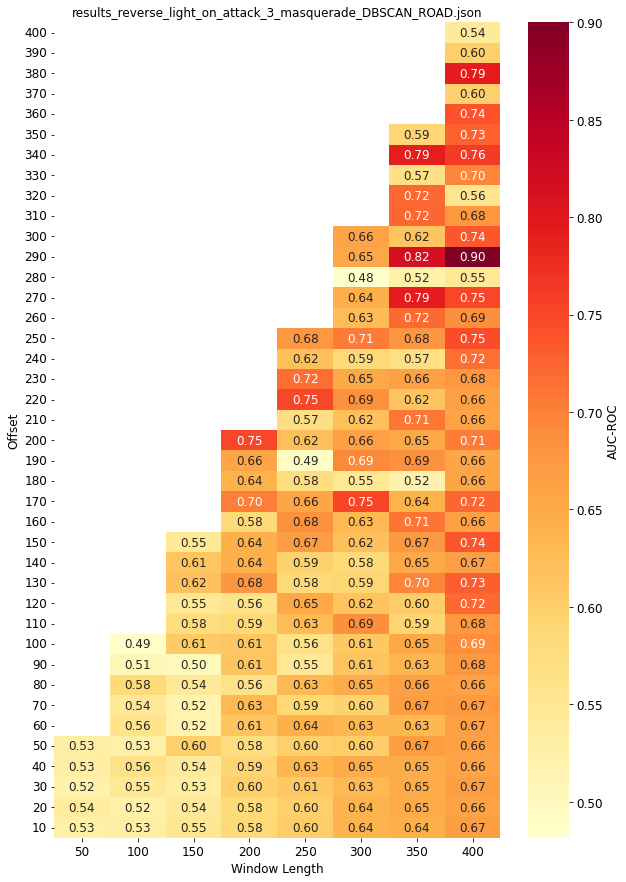

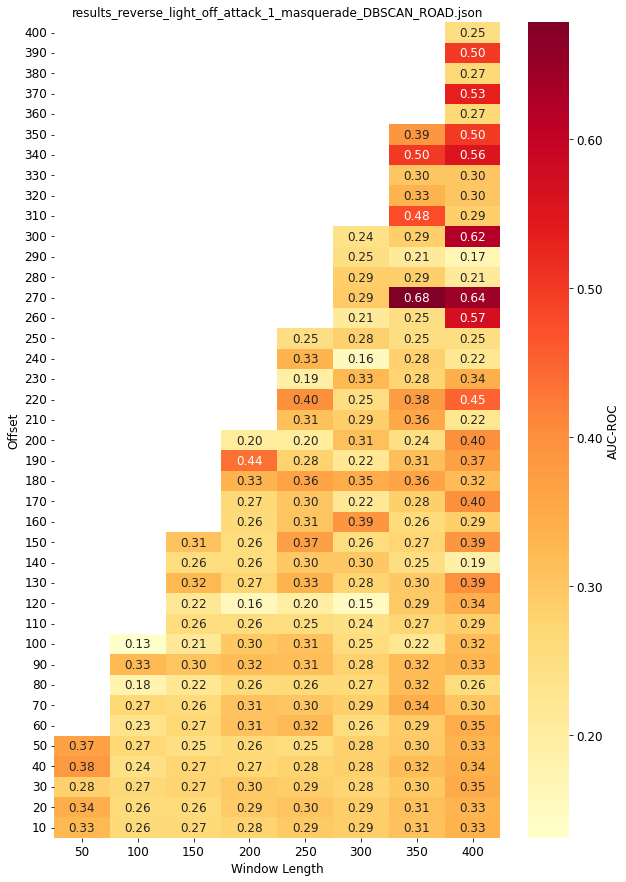

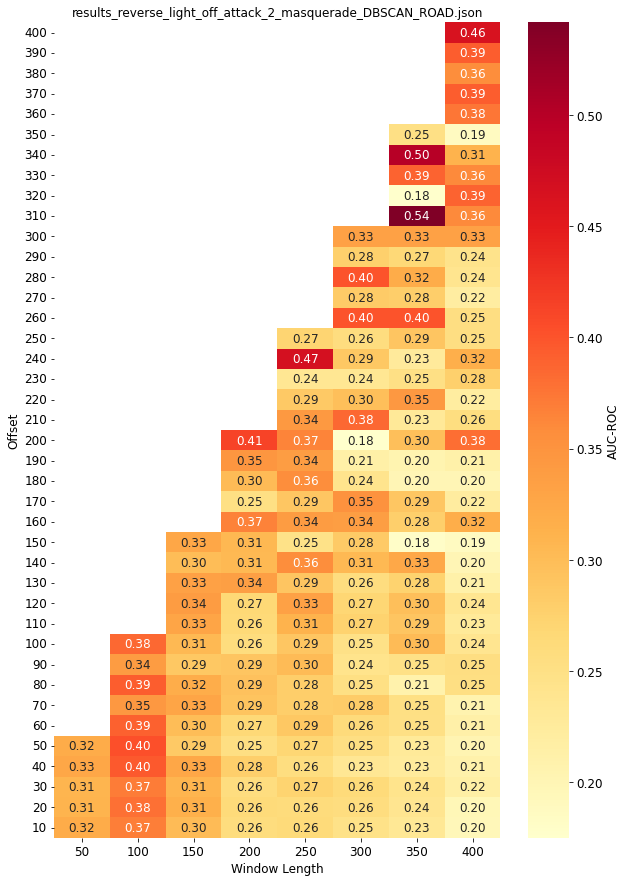

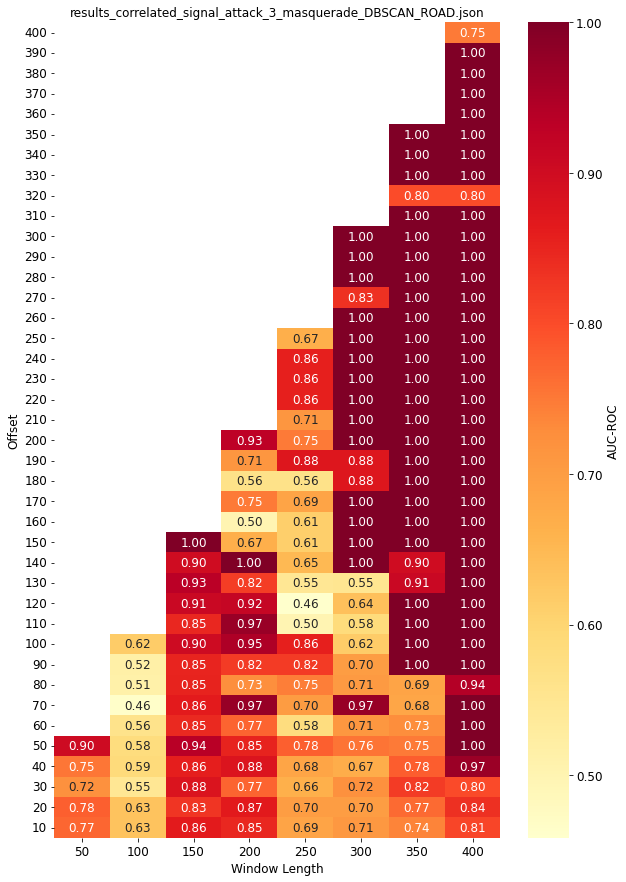

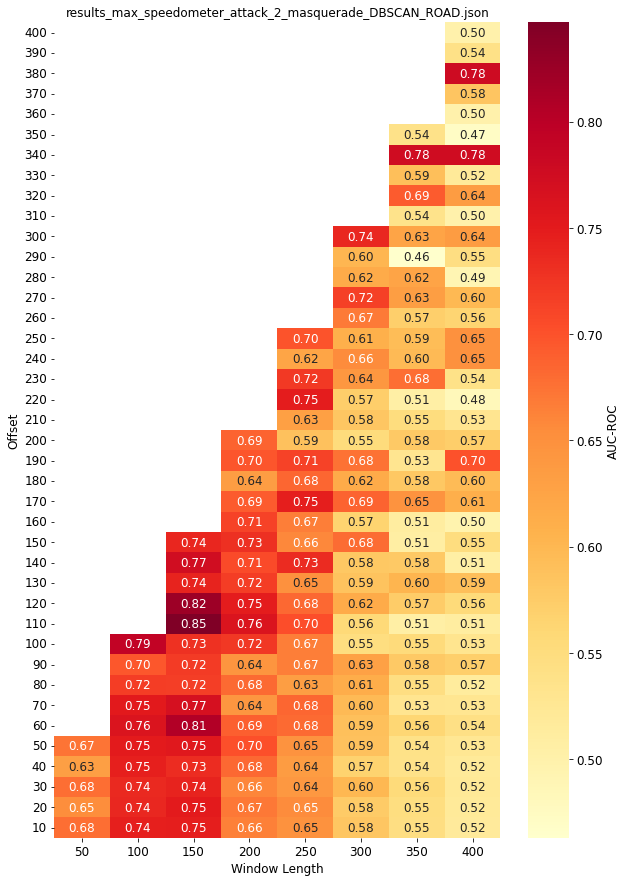

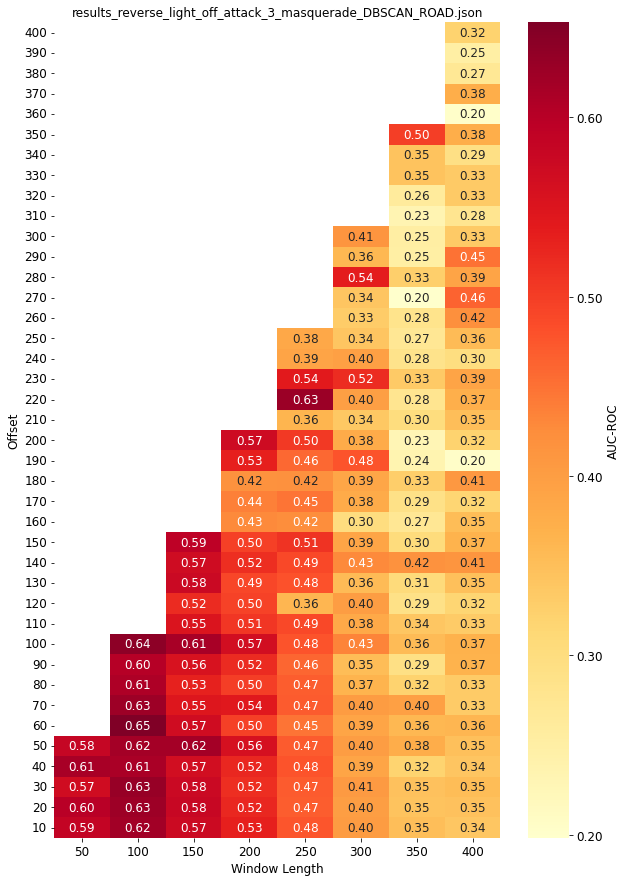

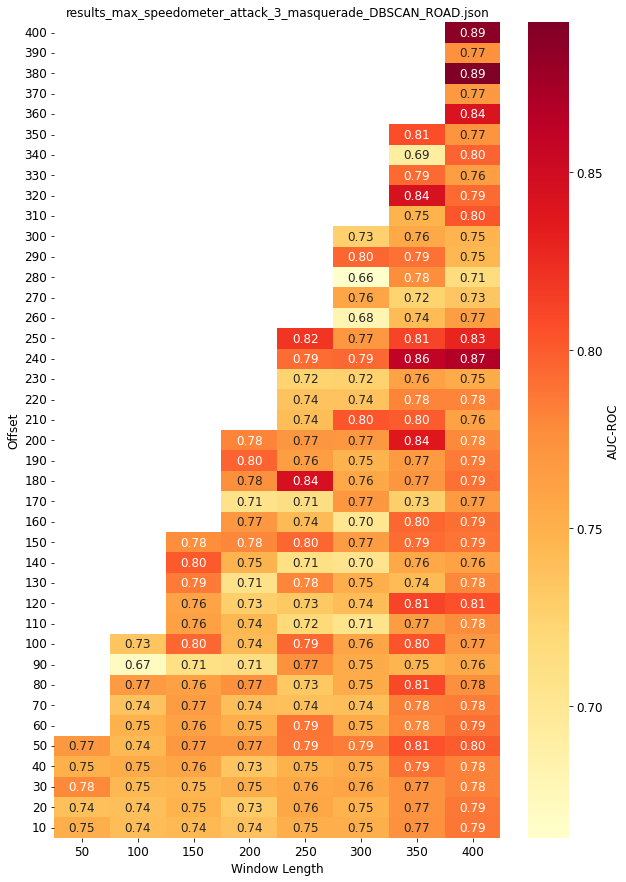

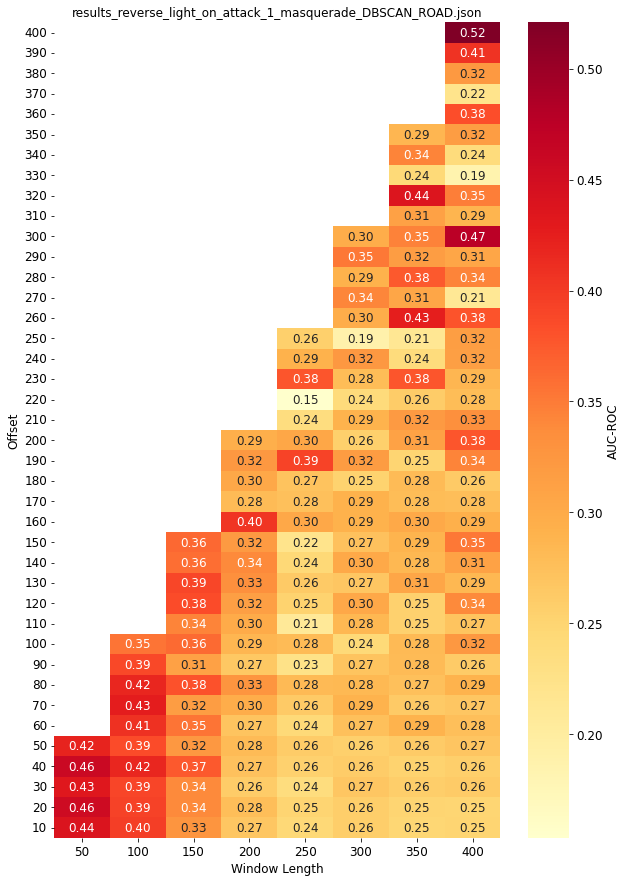

In [14]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index

    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by AHC Method

In [15]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_AHC_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_reverse_light_off_attack_1_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_2_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_AHC_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_1_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_1_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_2_masquerade_AHC_ROAD.json']


results_reverse_light_off_attack_1_masquerade_AHC_ROAD.json
results_correlated_signal_attack_2_masquerade_AHC_ROAD.json
results_reverse_light_off_attack_3_masquerade_AHC_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_AHC_ROAD.json
results_max_speedometer_attack_1_masquerade_AHC_ROAD.json
results_max_speedometer_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_2_masquerade_AHC_ROAD.json
results_correlated_signal_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_1_masquerade_AHC_ROAD.json
results_correlated_signal_attack_1_masquerade_AHC_ROAD.json
results_reverse_light_off_attack_2_masquerade_AHC_ROAD.json
results_max_speedometer_attack_2_masquerade_AHC_ROAD.json


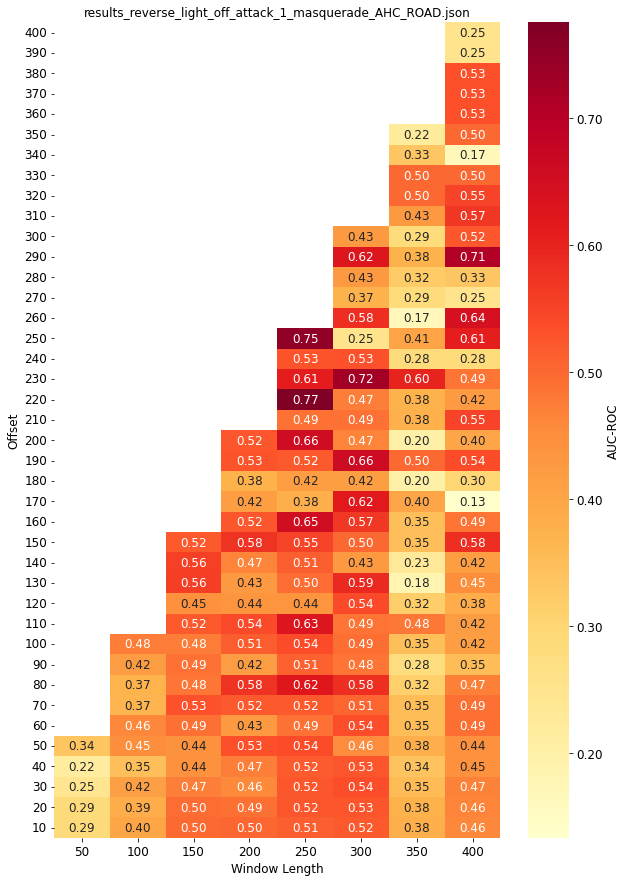

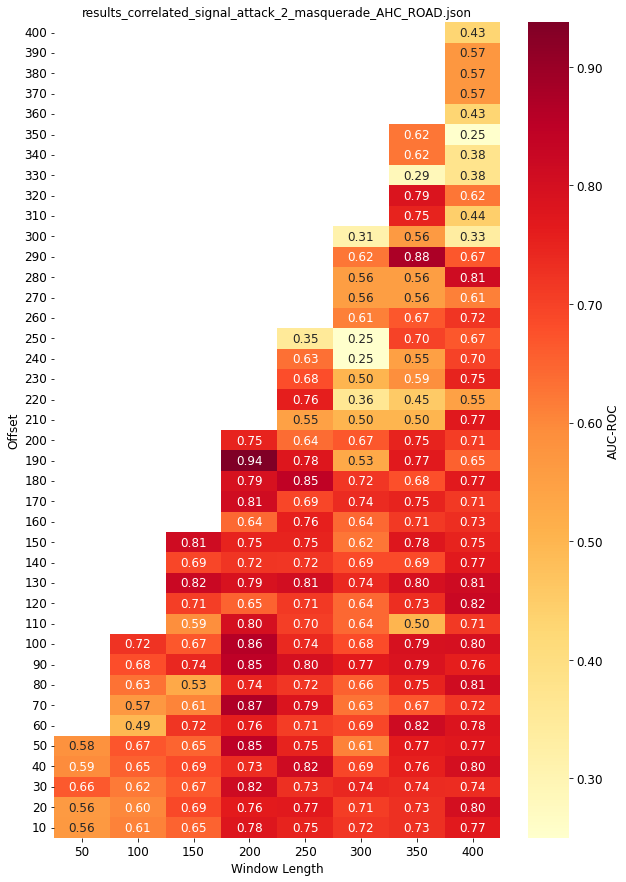

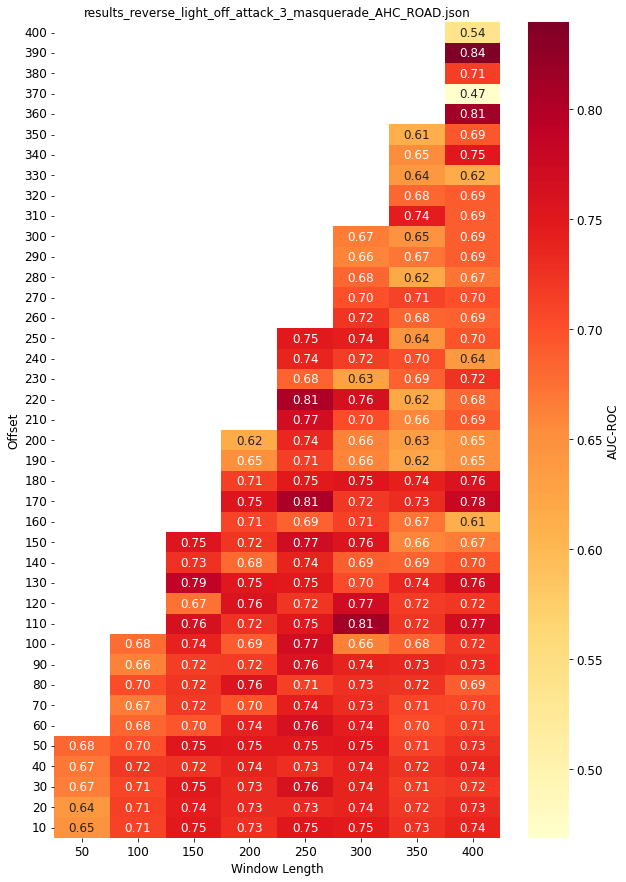

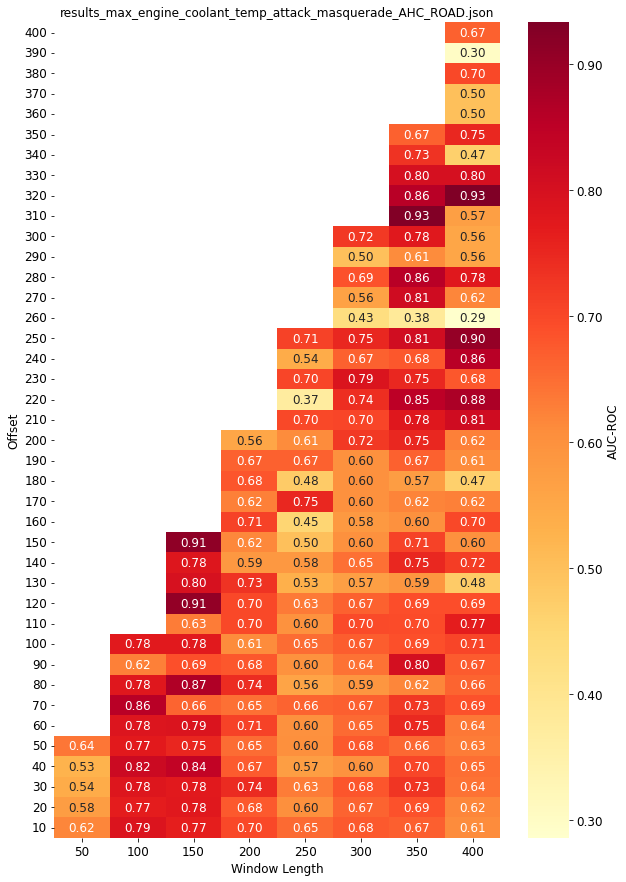

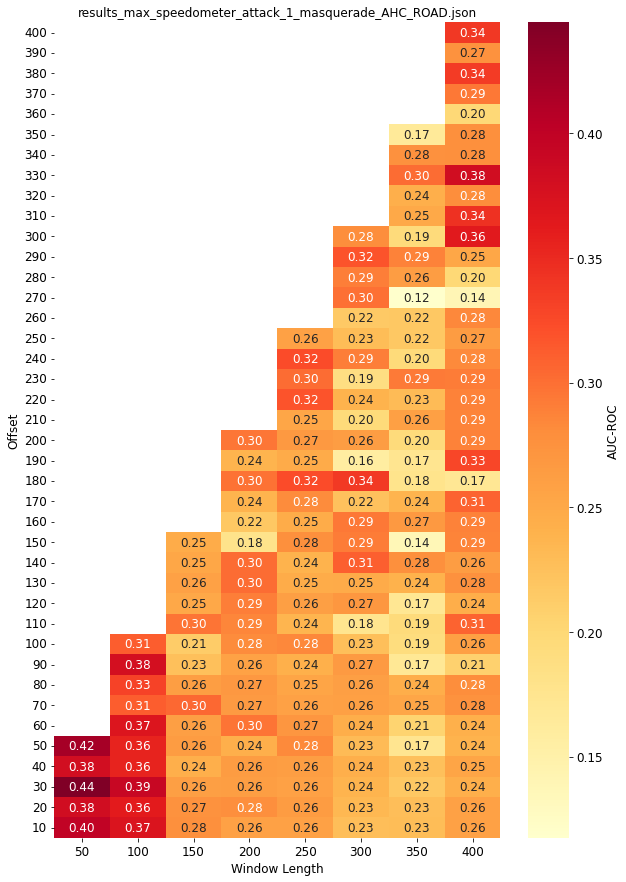

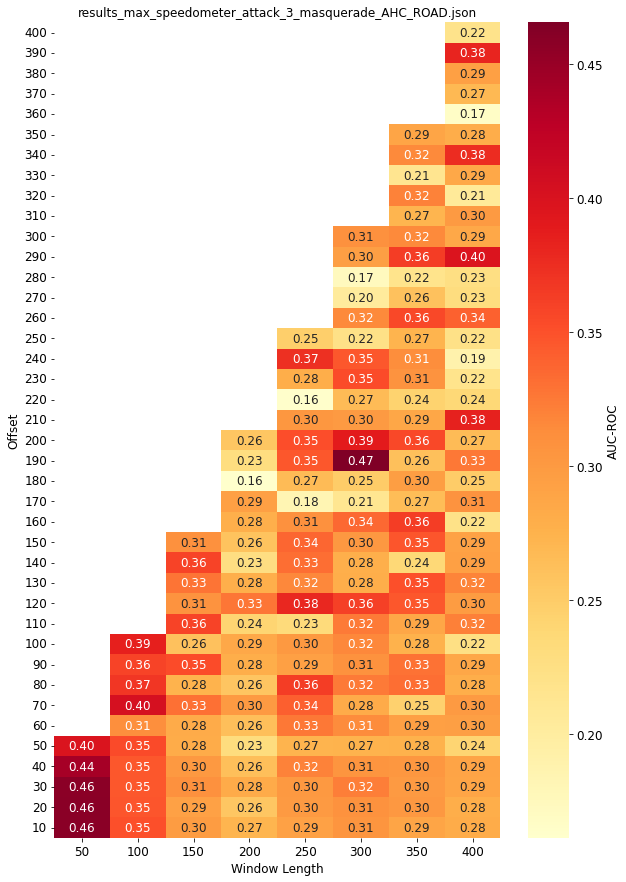

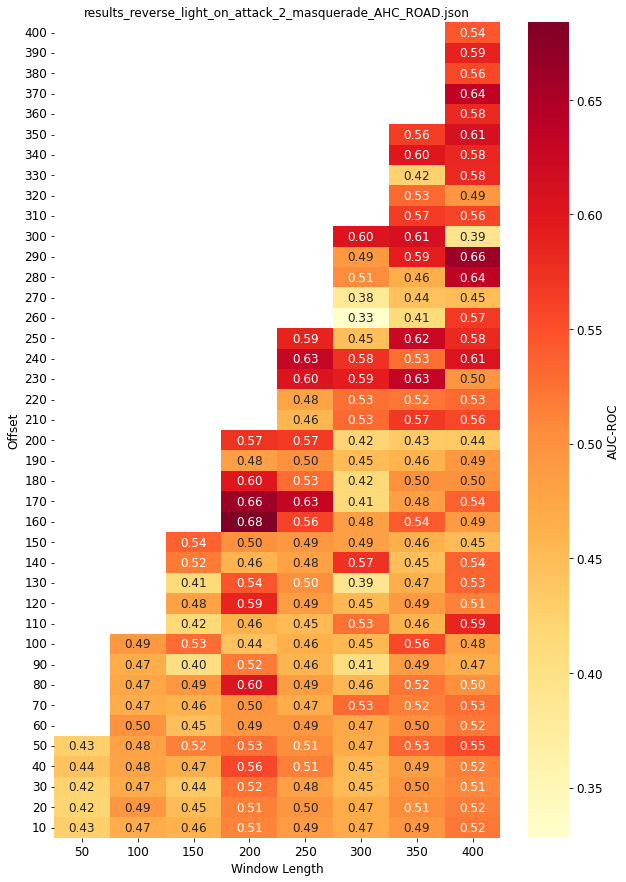

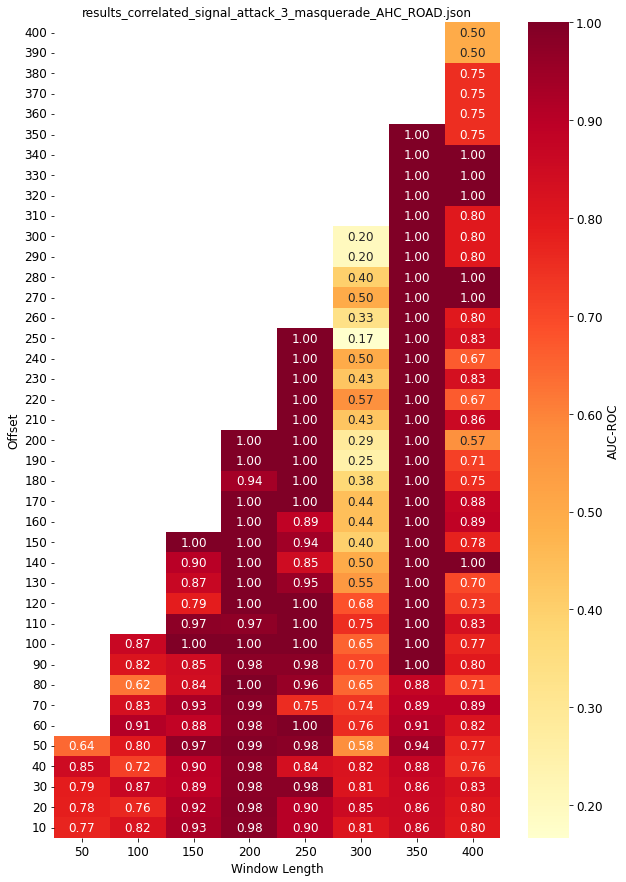

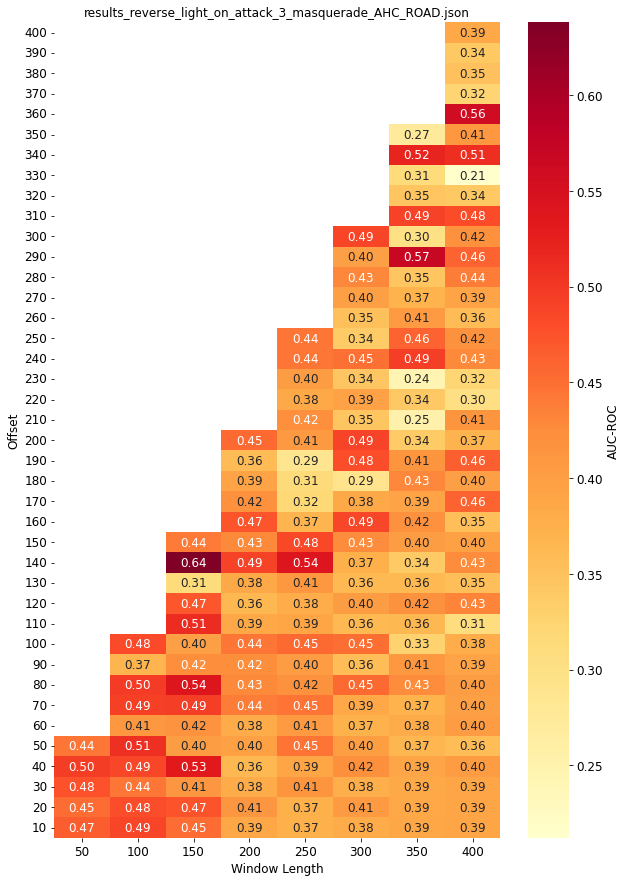

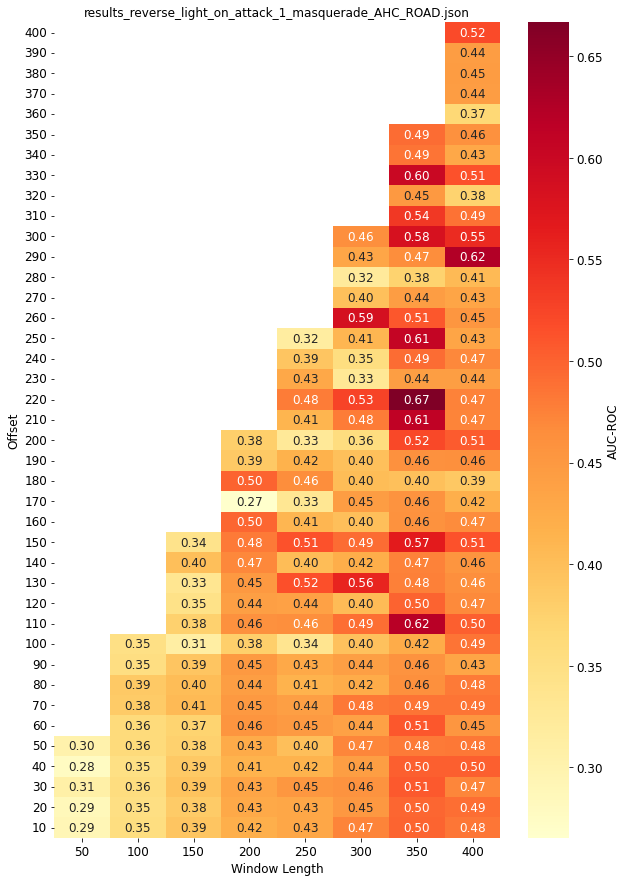

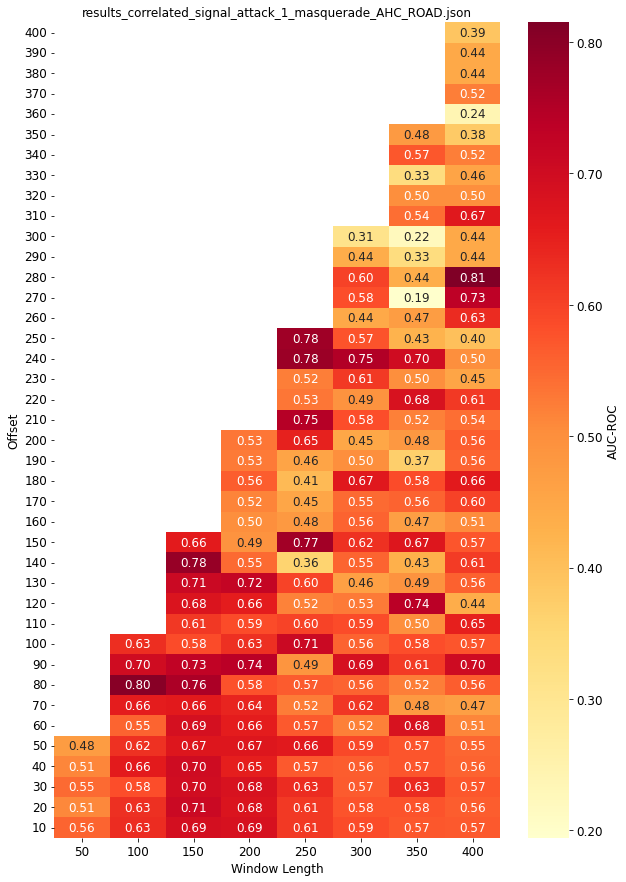

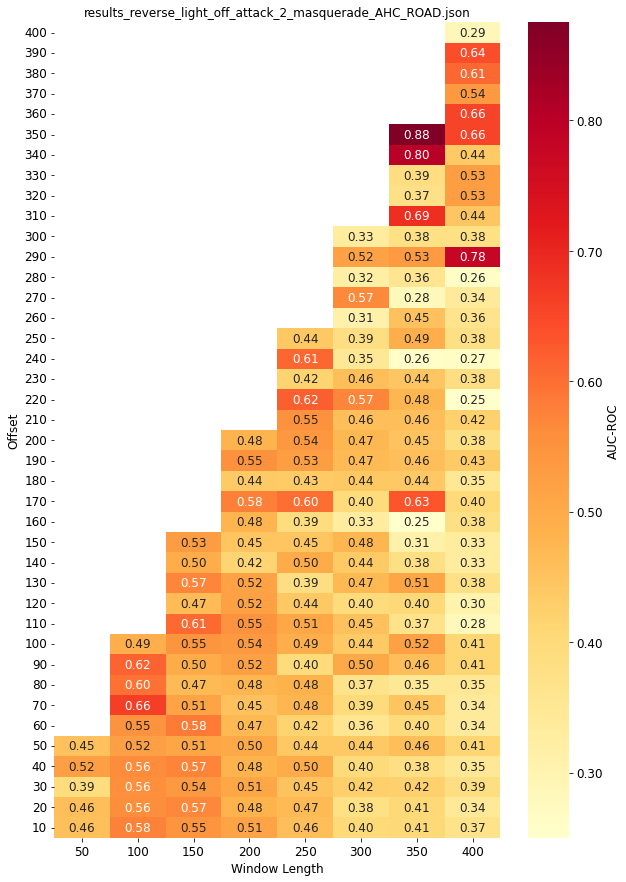

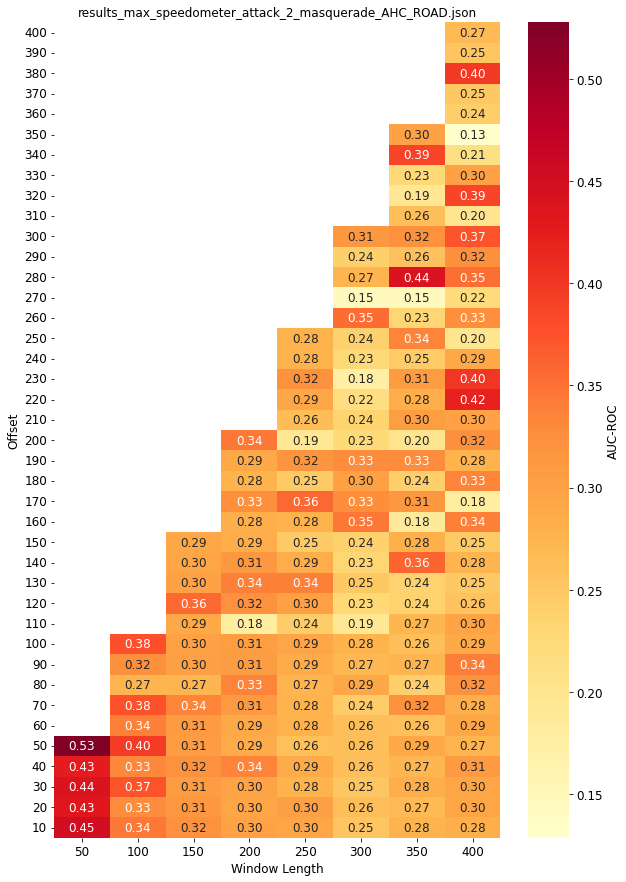

In [16]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index

    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)